<a href="https://colab.research.google.com/github/nhattan206/AI_project/blob/main/NhanDienCamXuc(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2
from os import listdir
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [6]:
def create_img_dataset(raw_folder,dataset_name):

    target_size = (150, 150)
    pictures = []
    labels = []

    for folder in listdir(raw_folder):
      print("Folder=",folder)
      for file in listdir(raw_folder + "/" + folder):
        print("File=", file)
        pictures.append(cv2.resize(cv2.imread((raw_folder + "/" + folder + "/" + file),cv2.IMREAD_GRAYSCALE)
                                              ,dsize = target_size))
        labels.append(folder)

    pictures = np.array(pictures)
    labels = np.array(labels)

    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)

    with open (dataset_name, mode = 'wb') as file:
    # dump information to that file
      pickle.dump((pictures,labels), file)

    file.close()

def load_data(dataset_path):

    file = open(dataset_path, mode = 'rb')
    # dump information to that file
    (pictures, labels) = pickle.load (file)
    file.close()

    return pictures, labels

raw_folder = "/content/drive/MyDrive/AI"

create_img_dataset(raw_folder= raw_folder,dataset_name= 'AI.txt')
dataset_path = "AI.txt"
x_data,y_data = load_data(dataset_path= 'AI.txt')

x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2, random_state=100)
x_test_1 = x_test

Folder= Buon
File= 1.jpg
File= 2.jpg
File= 3.jpg
File= 4.jpg
File= 5.jpg
File= 6.jpg
File= 7.jpg
File= 8.jpg
File= 9.jpg
File= 10.jpg
File= 11.jpg
File= 12.jpg
File= 13.jpg
File= 14.jpg
File= 15.jpg
File= 16.jpg
File= 17.jpg
File= 18.jpg
File= 19.jpg
File= 20.jpg
File= 21.jpg
File= 22.jpg
File= 23.jpg
File= 24.jpg
File= 25.jpg
File= 26.jpg
File= 27.jpg
File= 28.jpg
File= 29.jpg
File= 30.jpg
Folder= HanhPhuc
File= 1.jpg
File= 2.jpg
File= 3.jpg
File= 4.jpg
File= 5.jpg
File= 6.jpg
File= 7.jpg
File= 8.jpg
File= 9.jpg
File= 10.jpg
File= 11.jpg
File= 12.jpg
File= 13.jpg
File= 14.jpg
File= 15.jpg
File= 16.jpg
File= 17.jpg
File= 18.jpg
File= 19.jpg
File= 20.jpg
File= 21.jpg
File= 22.jpg
File= 23.jpg
File= 24.jpg
File= 25.jpg
File= 26.jpg
File= 27.jpg
File= 28.jpg
File= 29.jpg
File= 30.jpg
Folder= GianDu
File= 1.jpg
File= 2.jpg
File= 3.jpg
File= 4.jpg
File= 5.jpg
File= 6.jpg
File= 7.jpg
File= 8.jpg
File= 9.jpg
File= 10.jpg
File= 11.jpg
File= 12.jpg
File= 13.jpg
File= 14.jpg
File= 15.jpg
File= 1

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0


In [4]:
x_label = ['Buon','GianDu','HanhPhuc','NgacNhien']

In [13]:
#Tạo mô hình CNN
model=Sequential()
#Block 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer = 'he_uniform',padding='same',input_shape=(150,150,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
#Block 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer = 'he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
#Block 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer = 'he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
#Tạo ANN
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      320       
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [15]:
#Bien Dich
opt=SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 87ms/step - loss: 1.4901e-07 - accuracy: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 62ms/step - loss: 6.4572e-08 - accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 62ms/step - loss: 8.6923e-09 - accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 64ms/step - loss: 2.4835e-09 - accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 62ms/step - loss: 6.2088e-09 - accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 63ms/step - loss: 1.2418e-09 - accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - accuracy

Hinh so  1
predictions: [2]
Cam xuc: HanhPhuc


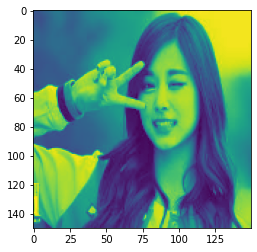

In [52]:
i = randint(0,len(y_test)-1)
sample = np.array([x_test[i]])
predictions = np.argmax(model.predict(sample), axis=-1)
print ('Hinh so ',i)
print("predictions:", predictions)
print("Cam xuc:", x_label[int(predictions)])
plt.imshow(x_test_1[i])